In [1]:
import SimpleITK as sitk
# from downloaddata import fetch_data as fdata
%matplotlib inline
from extensies import gui
from extensies import registration_gui as rgui
from extensies import preprocessing as ppcs
from extensies import normalization 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

import re 

### Load findings and informations about images

In [2]:
df_images = pd.read_csv('../data/ProstateX-TrainingLesionInformationv2/ProstateX-TrainingLesionInformationv2/ProstateX-Images-Train.csv')
df_findings = pd.read_csv('../data/ProstateX-TrainingLesionInformationv2/ProstateX-TrainingLesionInformationv2/ProstateX-Findings-Train.csv')
df_ktrans = pd.read_csv('../../data/info/ProstateX-Images-KTrans-Train.csv')

In [5]:
df_images['ProxID'].unique()

array(['ProstateX-0000', 'ProstateX-0001', 'ProstateX-0002',
       'ProstateX-0003', 'ProstateX-0004', 'ProstateX-0005',
       'ProstateX-0006', 'ProstateX-0007', 'ProstateX-0008',
       'ProstateX-0009', 'ProstateX-0010', 'ProstateX-0011',
       'ProstateX-0012', 'ProstateX-0013', 'ProstateX-0014',
       'ProstateX-0015', 'ProstateX-0016', 'ProstateX-0017',
       'ProstateX-0018', 'ProstateX-0019', 'ProstateX-0020',
       'ProstateX-0021', 'ProstateX-0022', 'ProstateX-0023',
       'ProstateX-0024', 'ProstateX-0025', 'ProstateX-0026',
       'ProstateX-0027', 'ProstateX-0028', 'ProstateX-0029',
       'ProstateX-0030', 'ProstateX-0031', 'ProstateX-0032',
       'ProstateX-0033', 'ProstateX-0034', 'ProstateX-0035',
       'ProstateX-0036', 'ProstateX-0037', 'ProstateX-0038',
       'ProstateX-0039', 'ProstateX-0040', 'ProstateX-0041',
       'ProstateX-0042', 'ProstateX-0043', 'ProstateX-0044',
       'ProstateX-0045', 'ProstateX-0046', 'ProstateX-0047',
       'ProstateX-0048',

In [3]:
root_path = '../../data/PROSTATEx'
path_to_data = '../../data/'
modality = 't2tsetra'
new_spacing = (0.5,0.5,3)
orientation = 't'
patch_size = (40,40,1)

target_path = os.path.join(path_to_data, modality, orientation, 
                            str(patch_size[0]) + 'x' + str(patch_size[1]) + 'x' + str(patch_size[2]))
new_df = pd.DataFrame(columns = ['ProxID','fid','zone','ClinSig','name'])
roi_t2w = []
findings = df_findings.drop(df_findings.index[[33,34,35,36,37,154]])
# iterate throught all findings
for idx,row in findings.iterrows():
    path_to_image = ppcs.get_path(row['ProxID'], modality, root_path)
    fixed_series_filenames = sitk.ImageSeriesReader_GetGDCMSeriesFileNames(path_to_image)
    image = sitk.ReadImage(fixed_series_filenames)
    # fit normalizer
    normalizer = normalization.ScaleNormalization()
    normalizer.fit(sitk.GetArrayFromImage(image))
    # resample image to same spacing in all directions
    image = ppcs.resample_image_to_spacing(image, new_spacing, sitk.sitkBSpline)

    # extract region of interest
    center = [float(x) for x in row['pos'].split()] 
    volume  = ppcs.get_patch_from_image(image, patch_size, center, orientation)

    volume = normalizer.normalise(volume)
    
    roi_t2w.append(volume)
    
#     file_name = row['ProxID']+'_'+str(idx)+'_'+row['zone']+'.nii'
#     new_df.loc[idx] = row[['ProxID','fid','zone','ClinSig']]
#     new_df.loc[idx,'name'] = file_name
    
#     ppcs.save_image(volume, os.path.join(target_path,file_name))
    
# new_df.to_csv(os.path.join(target_path,'info.csv'))
print(len(roi_t2w))

324


In [4]:
modality = 'adc'
roi_adc = []
# iterate throught all findings
for idx,row in findings.iterrows():
    path_to_image = ppcs.get_path(row['ProxID'], modality, root_path)
    fixed_series_filenames = sitk.ImageSeriesReader_GetGDCMSeriesFileNames(path_to_image)
    image = sitk.ReadImage(fixed_series_filenames)
    # fit normalizer
    normalizer = normalization.ScaleNormalization()
    normalizer.fit(sitk.GetArrayFromImage(image))
    # resample image to same spacing in all directions
    image = ppcs.resample_image_to_spacing(image, new_spacing, sitk.sitkBSpline)

    # extract region of interest
    center = [float(x) for x in row['pos'].split()] 
    volume  = ppcs.get_patch_from_image(image, patch_size, center, orientation)

    volume = normalizer.normalise(volume)
    
    roi_adc.append(volume)
print(len(roi_adc))

324


In [5]:
modality = 'ktrans'
roi_ktrans = []
# iterate throught all findings
for idx,row in findings.iterrows():
    print(idx)
    path_to_image = os.path.join(path_to_data,'Ktrans',row['ProxID'])
    image_name  = row['ProxID'] + '-Ktrans.mhd'
    image = sitk.ReadImage(os.path.join(path_to_image,image_name))
    # fit normalizer
    normalizer = normalization.ScaleNormalization()
    normalizer.fit(sitk.GetArrayFromImage(image))
    # resample image to same spacing in all directions
    image = ppcs.resample_image_to_spacing(image, new_spacing, sitk.sitkBSpline)

    # extract region of interest
    center = [float(x) for x in row['pos'].split()]
    if idx == 154:
        center = ((2.5049999999999955, 56.502799760464114, -11.32366482773891))
    volume  = ppcs.get_patch_from_image(image, patch_size, center, orientation)

    volume = normalizer.normalise(volume)
    
    roi_ktrans.append(volume)
print(len(roi_ktrans))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
2

## findings.loc[154]

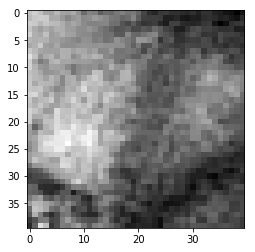

In [7]:
plt.imshow(roi_t2w[0],cmap = 'gray')

In [12]:
roi_t2wr = [x.reshape((40,40,1)) for x in roi_t2w]
roi_adcr = [x.reshape((40,40,1)) for x in roi_adc]
roi_ktransr = [x.reshape((40,40,1)) for x in roi_ktrans]

(40, 40, 1)

In [22]:
concated_image = np.concatenate((roi_t2wr,roi_adcr,roi_ktransr), axis=3)
concated_image2 = np.concatenate((roi_adcr,roi_ktransr,roi_t2wr), axis=3)
concated_image3 = np.concatenate((roi_adcr,roi_ktransr), axis=3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


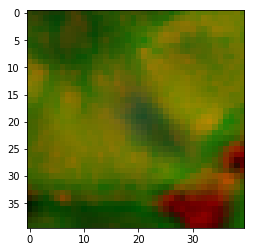

In [37]:
plt.imshow(concated_image[7])

In [26]:
path_to_image = os.path.join(path_to_data,'Ktrans',row['ProxID'])
image_name  = row['ProxID'] + '-Ktrans.mhd'
image = sitk.ReadImage(os.path.join(path_to_image,image_name))
center = [float(x) for x in row['pos'].split()] 
volume  = ppcs.get_patch_from_image(image, [20,20,1], center, orientation)

Exception: Boundaries out of image!

In [32]:
image.TransformPhysicalPointToContinuousIndex((2.505, 57.0002, -9.38642))

(62.83899998402452, 77.89004472113008, 16.57145182417111)

In [39]:
image.TransformContinuousIndexToPhysicalPoint((62.83899998402452, 77.89004472113008, 16))

(2.5049999999999955, 56.502799760464114, -11.32366482773891)

In [36]:
df_ktrans[df_ktrans['ProxID'] == 'ProstateX-0105']

,ProxID,fid,pos,WorldMatrix,ijk
157,ProstateX-0105,1,11.2381 21.7529 -40.6015,"1.5,3.07655e-010,1.38486e-016,-91.7535,-2.9799...",69 60 5
158,ProstateX-0105,2,-0.459897 49.843 -23.0353,"1.5,3.07655e-010,1.38486e-016,-91.7535,-2.9799...",61 76 12
159,ProstateX-0105,3,2.505 57.0002 -9.38642,"1.5,3.07655e-010,1.38486e-016,-91.7535,-2.9799...",63 78 17


In [37]:
df_findings[df_findings['ProxID'] == 'ProstateX-0105']

,ProxID,fid,pos,zone,ClinSig
152,ProstateX-0105,1,11.2381 21.7529 -40.6015,TZ,True
153,ProstateX-0105,2,-0.459897 49.843 -23.0353,TZ,False
154,ProstateX-0105,3,2.505 57.0002 -9.38642,SV,False


In [38]:
df_images[df_images['ProxID'] == 'ProstateX-0105']

,ProxID,Name,fid,pos,WorldMatrix,ijk,TopLevel,SpacingBetweenSlices,VoxelSpacing,Dim,DCMSerDescr,DCMSerNum
1589,ProstateX-0105,ep2d_diff_tra_DYNDIST_ADC0,2,-0.459897 49.843 -23.0353,"2,4.10207e-010,1.18702e-016,-80.0035,-3.97319e...",40 73 15,NaN,3.0,"2,2,3",84x128x21x1,ep2d_diff_tra_DYNDIST_ADC,7
1590,ProstateX-0105,ep2d_diff_tra_DYNDIST_ADC0,3,2.505 57.0002 -9.38642,"2,4.10207e-010,1.18702e-016,-80.0035,-3.97319e...",41 75 20,NaN,3.0,"2,2,3",84x128x21x1,ep2d_diff_tra_DYNDIST_ADC,7
1591,ProstateX-0105,ep2d_diff_tra_DYNDIST_ADC0,1,11.2381 21.7529 -40.6015,"2,4.10207e-010,1.18702e-016,-80.0035,-3.97319e...",46 61 7,NaN,3.0,"2,2,3",84x128x21x1,ep2d_diff_tra_DYNDIST_ADC,7
1592,ProstateX-0105,ep2d_diff_tra_DYNDIST0,2,-0.459897 49.843 -23.0353,"2,4.10207e-010,1.18702e-016,-80.0035,-3.97319e...",40 73 15,NaN,3.0,"2,2,3",84x128x21x1,ep2d_diff_tra_DYNDIST,6
1593,ProstateX-0105,ep2d_diff_tra_DYNDIST0,3,2.505 57.0002 -9.38642,"2,4.10207e-010,1.18702e-016,-80.0035,-3.97319e...",41 75 20,NaN,3.0,"2,2,3",84x128x21x1,ep2d_diff_tra_DYNDIST,6
1594,ProstateX-0105,ep2d_diff_tra_DYNDIST0,1,11.2381 21.7529 -40.6015,"2,4.10207e-010,1.18702e-016,-80.0035,-3.97319e...",46 61 7,NaN,3.0,"2,2,3",84x128x21x1,ep2d_diff_tra_DYNDIST,6
1595,ProstateX-0105,ep2d_diff_tra_DYNDIST1,2,-0.459897 49.843 -23.0353,"2,4.10207e-010,1.18702e-016,-80.0035,-3.97319e...",40 73 15,NaN,3.0,"2,2,3",84x128x21x1,ep2d_diff_tra_DYNDIST,6
1596,ProstateX-0105,ep2d_diff_tra_DYNDIST1,3,2.505 57.0002 -9.38642,"2,4.10207e-010,1.18702e-016,-80.0035,-3.97319e...",41 75 20,NaN,3.0,"2,2,3",84x128x21x1,ep2d_diff_tra_DYNDIST,6
1597,ProstateX-0105,ep2d_diff_tra_DYNDIST1,1,11.2381 21.7529 -40.6015,"2,4.10207e-010,1.18702e-016,-80.0035,-3.97319e...",46 61 7,NaN,3.0,"2,2,3",84x128x21x1,ep2d_diff_tra_DYNDIST,6
1598,ProstateX-0105,ep2d_diff_tra_DYNDIST2,2,-0.459897 49.843 -23.0353,"2,4.10207e-010,1.18702e-016,-80.0035,-3.97319e...",40 73 15,NaN,3.0,"2,2,3",84x128x21x1,ep2d_diff_tra_DYNDIST,6


In [50]:
root_path = '../../data/PROSTATEx'
path_to_data = '../../data/'
modality = 'adc'
new_spacing = (0.5,0.5,0.5)
orientation = 't'
patch_size = (28,28,1)


path_to_image = ppcs.get_path(row['ProxID'], modality, root_path)
fixed_series_filenames = sitk.ImageSeriesReader_GetGDCMSeriesFileNames(path_to_image)
image = sitk.ReadImage(fixed_series_filenames)
# image = ppcs.resample_image_to_spacing(image, new_spacing, sitk.sitkBSpline)
# 
# center = [float(x) for x in row['pos'].split()] 
# volume  = ppcs.get_patch_from_image(image, patch_size, center, orientation)

In [51]:
print(image.GetSize())
print(image.GetSpacing())
print(image.GetOrigin())

(84, 128, 19)
(2.0, 2.0, 2.999999761581421)
(-71.29265594482422, -101.67921447753906, -5.4167399406433105)


In [35]:
df_ktrans

,ProxID,fid,pos,WorldMatrix,ijk
0,ProstateX-0000,1,25.7457 31.8707 -38.511,"1.5,3.00503e-010,0.00377059,-58.4317,-0.000597...",56 75 7
1,ProstateX-0001,1,-40.5367071921656 29.320722668457 -16.70766907...,"1.5,3.07655e-010,-4.64581e-017,-116.977,-3.057...",51 61 6
2,ProstateX-0002,1,-27.0102 41.5467 -26.0469,"1.5,3.07655e-010,7.98512e-017,-104.284,-2.9890...",52 73 11
3,ProstateX-0002,2,-2.058 38.6752 -34.6104,"1.5,3.07655e-010,7.98512e-017,-104.284,-2.9890...",68 72 8
4,ProstateX-0003,1,22.1495 31.2717 -2.45933,"1.5,3.07655e-010,3.75383e-017,-98.5005,-2.5684...",80 69 10
5,ProstateX-0003,2,-21.2871 19.3995 19.7429,"1.5,3.07655e-010,3.75383e-017,-98.5005,-2.5684...",51 54 13
6,ProstateX-0004,1,-7.69665 3.64226 23.1659,"1.5,3.07655e-010,7.04037e-017,-118.663,-2.9851...",74 56 6
7,ProstateX-0005,0,-14.5174331665039 49.4428329467773 20.78152465...,"1.5,3.07655e-010,1.10673e-016,-117.778,-3.0648...",69 78 8
8,ProstateX-0005,1,-22.0892639160156 25.4668045043945 22.87915420...,"1.5,3.07655e-010,1.10673e-016,-117.778,-3.0648...",64 62 8
9,ProstateX-0005,1,-38.6276 42.2781 21.4084,"1.5,3.07655e-010,1.10673e-016,-117.778,-3.0648...",53 73 8
